In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

In [2]:
df = pd.read_csv("../data/tonedata.csv", sep=' ')
df

,stretchratio,tuned
0,1.35,1.461
1,1.40,1.407
2,1.45,1.452
3,1.50,1.300
4,1.55,1.351
...,...,...
145,2.75,2.066
146,2.80,2.426
147,2.85,2.117
148,2.90,2.097


In [3]:
X = df.stretchratio.values.astype('d')
Xs = X.reshape(-1,1)
Y = df.tuned.values.astype('d')

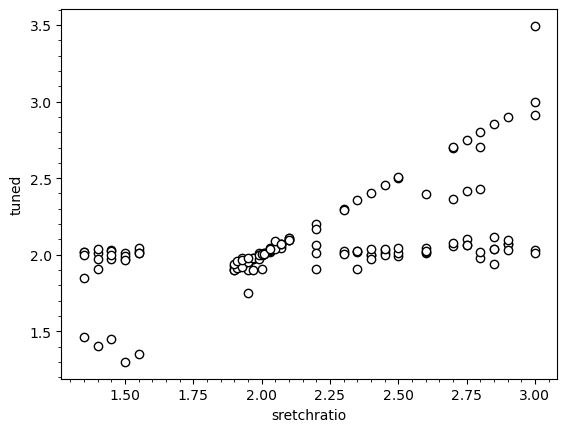

In [12]:
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidths=1.)
plt.minorticks_on()
plt.xlabel('sretchratio')
plt.ylabel('tuned')
plt.show()

In [5]:
mod_ls = models.LinearModel(1)
mod_r = models.LinearModel(1)
mod_m = models.LinearModel(1)
mod_wm = models.LinearModel(1)
mod_ls2 = models.LinearModel(1)

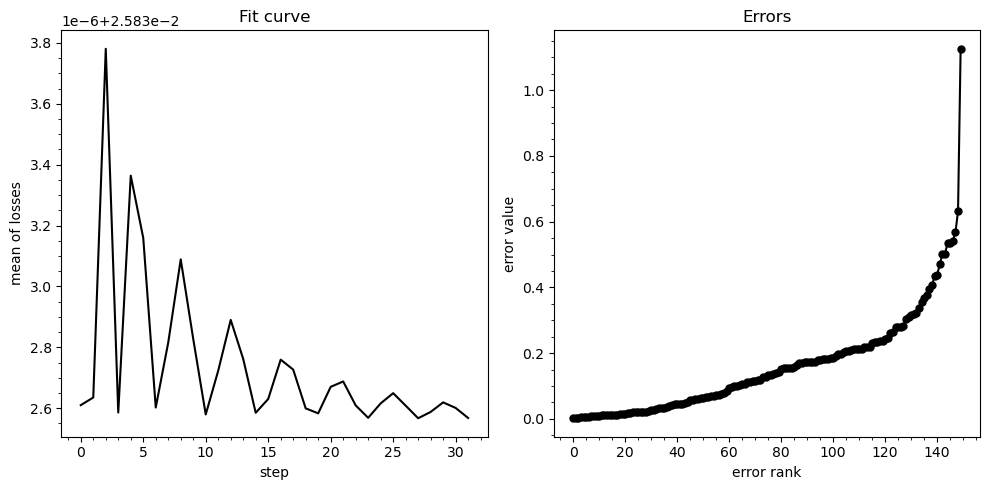

In [13]:
regr_ls = regr.regression(Xs, Y, mod_ls, h=0.01, n_iter=5000)
regr.plot_losses_and_errors(regr_ls, Xs, Y)

0.1359434133700304


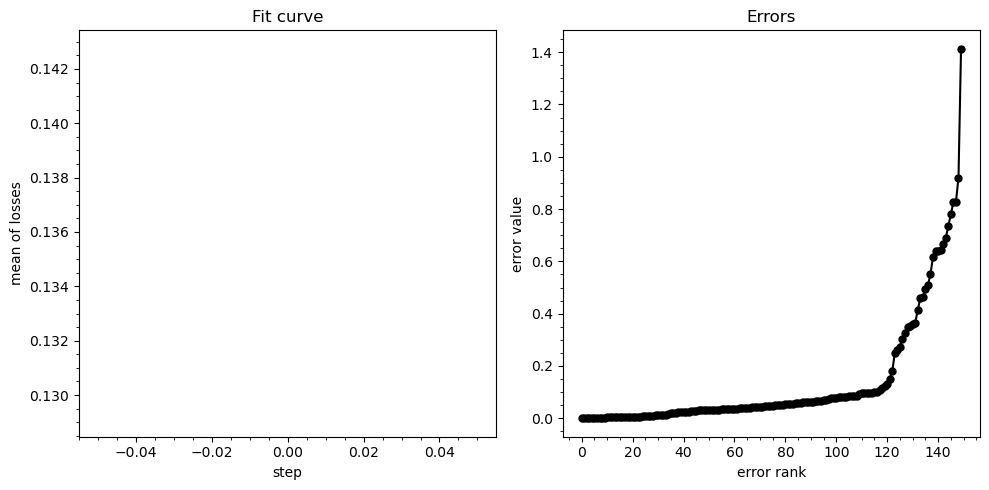

In [14]:
regr_r = regr.r_regression_irls(Xs, Y, mod_r, funcs.Sqrt(0.001), h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_r, Xs, Y)

0.0012929123220738296


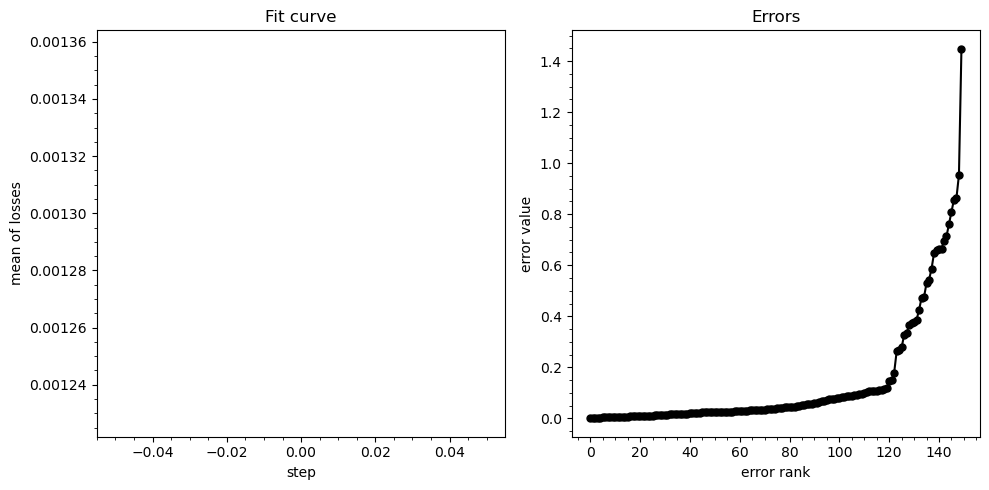

In [15]:
avrfunc_m = regr.averaging_function("M", funcs.quantile_func(0.5, funcs.Sqrt(0.001)))
regr_m = regr.m_regression_irls(Xs, Y, mod_m, agg_func=avrfunc_m, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_m, Xs, Y)

0.001403047727229186


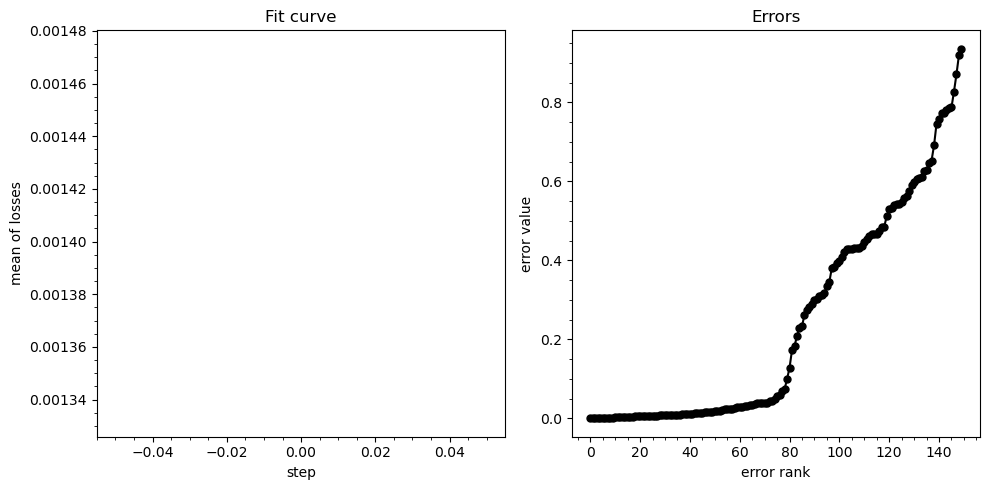

In [16]:
avrfunc_wm = regr.averaging_function("WM", funcs.quantile_func(0.5, funcs.Sqrt(0.001)))
regr_wm = regr.m_regression_irls(Xs, Y, mod_wm, agg_func=avrfunc_wm, h=0.001, n_iter=5000)
regr.plot_losses_and_errors(regr_wm, Xs, Y)

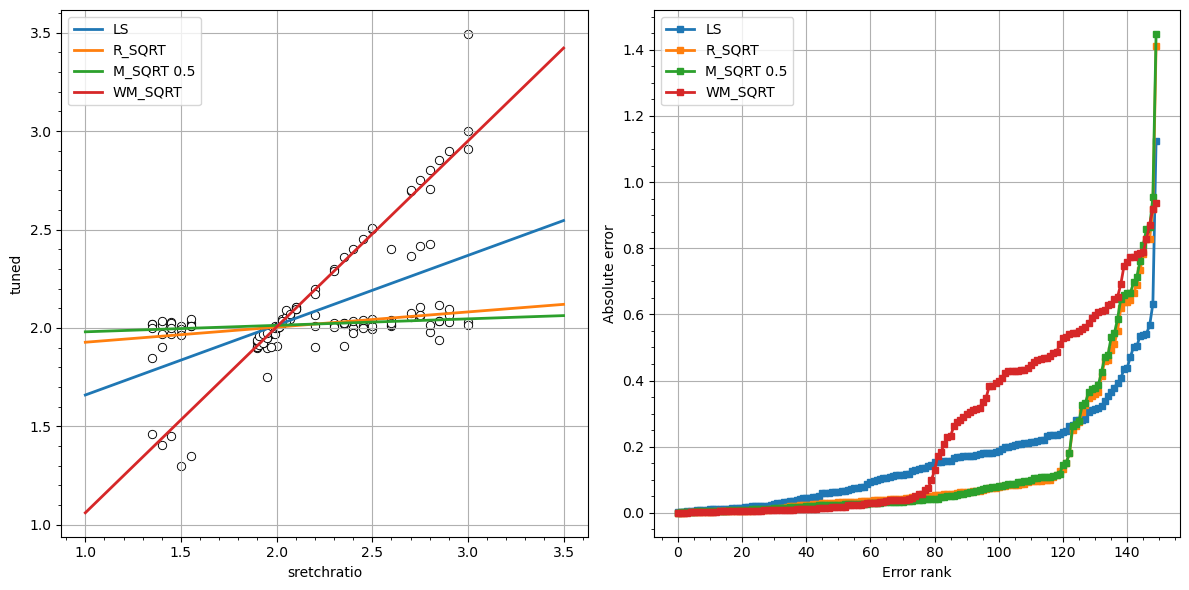

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=0.66)
plt.xlabel('sretchratio')
plt.ylabel('tuned')
plt.plot([1,3.5], mod_ls.evaluate_all([1,3.5]), label='LS', linewidth=2.)
plt.plot([1,3.5], mod_r.evaluate_all([1,3.5]), label='R_SQRT', linewidth=2.)
plt.plot([1,3.5], mod_m.evaluate_all([1,3.5]), label='M_SQRT 0.5', linewidth=2.)
plt.plot([1,3.5], mod_wm.evaluate_all([1,3.5]), label='WM_SQRT', linewidth=2.)
# plt.plot([1,3.5], mod_ls2.evaluate_all([1,3.5]), label='LS (wo)', linewidth=2.)
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y-mod_ls.evaluate_all(X[:,None]))), label='LS', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_r.evaluate_all(X[:,None]))), label='R_SQRT', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_m.evaluate_all(X[:,None]))), label='M_SQRT 0.5', linewidth=2., marker='s', markersize=4)
plt.plot(sorted(np.abs(Y-mod_wm.evaluate_all(X[:,None]))), label='WM_SQRT', linewidth=2., marker='s', markersize=4)
# plt.plot(sorted(np.abs(Y-mod_ls2.evaluate_all(X[:,None]))), label='LS (wo)', linewidth=2., marker='s', markersize=4)
plt.legend()
plt.minorticks_on()
plt.xlabel('Error rank')
plt.ylabel('Absolute error')
plt.grid(1)
plt.tight_layout()
# plt.savefig('fig/rob_linregr_starsCYG.eps')
plt.show()

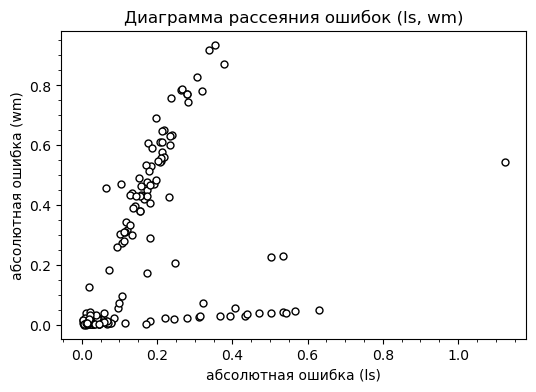

In [11]:
plt.figure(figsize=(6,4))
errs1 = np.abs(mod_ls.evaluate_all(Xs) - Y)
errs2 = np.abs(mod_wm.evaluate_all(Xs) - Y)
plt.title('Диаграмма рассеяния ошибок (ls, wm)')
plt.scatter(errs1, errs2, s=25, c='w', edgecolors='k')
# plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
plt.xlabel('абсолютная ошибка (ls)')
plt.ylabel('абсолютная ошибка (wm)')
plt.minorticks_on()
plt.show()

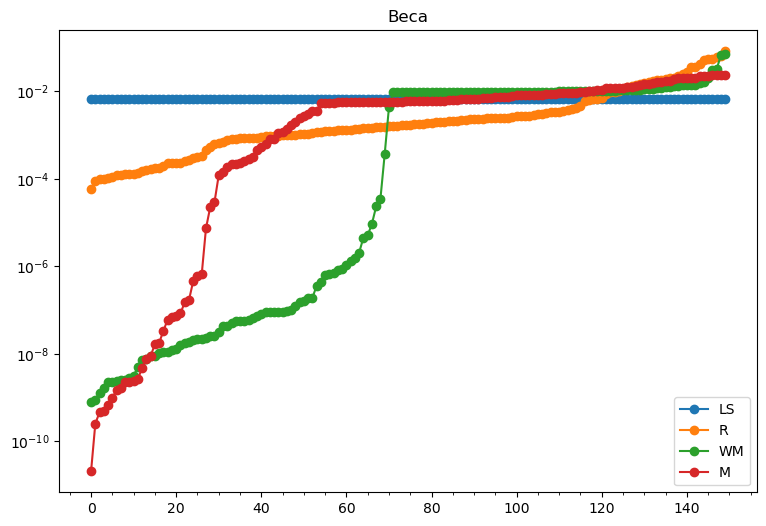

In [20]:
plt.figure(figsize=(9,6))
plt.title("Веса")
regr.plot_sample_weights(regr_ls, 'LS')
regr.plot_sample_weights(regr_r, 'R')
regr.plot_sample_weights(regr_wm, 'WM')
regr.plot_sample_weights(regr_m, 'M')
plt.minorticks_on()
plt.gca().set_yscale('log')
plt.legend()
plt.show()